In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data set

In [2]:
housing = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#### Checking for columns having NaN values

In [4]:
housing.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### Another method for finding the columns having null values

In [5]:
[feature for feature in housing.columns if housing[feature].isnull().sum()>0]

['location', 'size', 'society', 'bath', 'balcony']

#### Data Cleaning

In [6]:
housing_1 = housing.drop(['society','availability','balcony','area_type'], axis = 1)

In [7]:
housing_1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
housing_1.dropna(subset=['size','location'], inplace= True)

In [9]:
def remove(size):
    return int(str(size).split()[0])

In [10]:
housing_1['size'] = housing_1['size'].apply(remove)

In [11]:
housing_1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [12]:
bhk = housing_1['size']

In [13]:
housing_1.insert(loc = 4,column='bhk',value=bhk)

In [14]:
housing_2 = housing_1.drop('size', axis = 'columns')

In [15]:
housing_2.head()

,location,total_sqft,bath,bhk,price
0,Electronic City Phase II,1056,2.0,2,39.07
1,Chikka Tirupathi,2600,5.0,4,120.00
2,Uttarahalli,1440,2.0,3,62.00
3,Lingadheeranahalli,1521,3.0,3,95.00
4,Kothanur,1200,2.0,2,51.00


In [16]:
housing_2.isnull().sum()

location       0
total_sqft     0
bath          57
bhk            0
price          0
dtype: int64

#### There are two ways to deal with null values, either fill them with its column mean value or remove the rows having null values

In [17]:
housing_3 = housing_2.fillna({"bath":housing_2.bath.median()})

In [18]:
housing_3.isnull().sum()

location      0
total_sqft    0
bath          0
bhk           0
price         0
dtype: int64

In [19]:
housing_4 = housing_3.copy()

In [20]:
housing_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   total_sqft  13303 non-null  object 
 2   bath        13303 non-null  float64
 3   bhk         13303 non-null  int64  
 4   price       13303 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 623.6+ KB


In [21]:
housing_4.head()

,location,total_sqft,bath,bhk,price
0,Electronic City Phase II,1056,2.0,2,39.07
1,Chikka Tirupathi,2600,5.0,4,120.00
2,Uttarahalli,1440,2.0,3,62.00
3,Lingadheeranahalli,1521,3.0,3,95.00
4,Kothanur,1200,2.0,2,51.00


In [22]:
housing_4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### You can see the column "total_sqft" has value in a range so need to convert into a single value

In [23]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

#### Fetching all the rows having total_sqft value in ranges

In [24]:
housing_4[~housing_4['total_sqft'].apply(isFloat)]

,location,total_sqft,bath,bhk,price
30,Yelahanka,2100 - 2850,4.0,4,186.000
56,Devanahalli,3010 - 3410,2.0,4,192.000
81,Hennur Road,2957 - 3450,2.0,4,224.500
122,Hebbal,3067 - 8156,4.0,4,477.000
137,8th Phase JP Nagar,1042 - 1105,2.0,2,54.005
...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,3.0,3,122.000
13059,Harlur,1200 - 1470,2.0,2,72.760
13240,Devanahalli,1020 - 1130,2.0,1,52.570
13265,Hoodi,1133 - 1384,2.0,2,59.135


In [25]:
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
housing_5 = housing_4.copy()
housing_5.total_sqft = housing_4.total_sqft.apply(sqft_to_num)

In [27]:
housing_5.head(5)

,location,total_sqft,bath,bhk,price
0,Electronic City Phase II,1056.0,2.0,2,39.07
1,Chikka Tirupathi,2600.0,5.0,4,120.00
2,Uttarahalli,1440.0,2.0,3,62.00
3,Lingadheeranahalli,1521.0,3.0,3,95.00
4,Kothanur,1200.0,2.0,2,51.00


#### Checking for duplicate rows

In [28]:
housing_5.duplicated().sum()

890

In [29]:
housing_5[housing_5.duplicated()]

,location,total_sqft,bath,bhk,price
242,Chandapura,645.0,1.0,1,16.45
887,Chandapura,1015.0,2.0,2,25.88
895,Whitefield,1116.0,2.0,2,51.91
905,Kanakpura Road,525.0,1.0,1,26.00
971,Haralur Road,1464.0,3.0,3,56.00
...,...,...,...,...,...
13291,Weavers Colony,812.0,1.0,1,26.00
13299,Whitefield,2856.0,5.0,4,154.50
13311,Ramamurthy Nagar,1500.0,9.0,7,250.00
13313,Uttarahalli,1345.0,2.0,3,57.00


#### Removing duplicate rows

In [30]:
housing_6 = housing_5.drop_duplicates()

#### Checking for duplicate rows

In [31]:
housing_6.duplicated().sum()

0

#### Feature Engineering

In [32]:
housing_7 = housing_6.copy()

In [33]:
housing_7['price_per_sqft'] = housing_6['price']*100000/housing_6['total_sqft']
housing_7.head()

,location,total_sqft,bath,bhk,price,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,2,39.07,3699.810606
1,Chikka Tirupathi,2600.0,5.0,4,120.00,4615.384615
2,Uttarahalli,1440.0,2.0,3,62.00,4305.555556
3,Lingadheeranahalli,1521.0,3.0,3,95.00,6245.890861
4,Kothanur,1200.0,2.0,2,51.00,4250.000000


In [34]:
len(housing_7.location.unique())

1304

#### Through the concept of Dimensionality Reduction, we would decrease the count of locations because there would be many locations which would have 2 or 3 data points

In [35]:
housing_7.location = housing_7.location.apply(lambda x:x.strip())
location_stats = housing_7.groupby(by = 'location')['location'].agg('count').sort_values(ascending = False)

In [36]:
location_stats

location
Whitefield               506
Sarjapur  Road           362
Electronic City          275
Thanisandra              226
Kanakpura Road           222
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kariyammana Agrahara       1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

#### We need to ignore those locations which appeared less than 10 times

In [37]:
len(location_stats[location_stats<10])

1045

In [38]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

location
Gollahalli               9
Medahalli                9
Chennammana Kere         9
Volagerekallahalli       9
Mathikere                9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Kariyammana Agrahara     1
whitefiled               1
Name: location, Length: 1045, dtype: int64

In [39]:
housing_7.location = housing_7.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(housing_7.location.unique())

249

In [40]:
housing_7.head()

,location,total_sqft,bath,bhk,price,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,2,39.07,3699.810606
1,Chikka Tirupathi,2600.0,5.0,4,120.00,4615.384615
2,Uttarahalli,1440.0,2.0,3,62.00,4305.555556
3,Lingadheeranahalli,1521.0,3.0,3,95.00,6245.890861
4,Kothanur,1200.0,2.0,2,51.00,4250.000000


#### Outlier removal

In [41]:
housing_7['total_sqft']/housing_7['bhk']

0         528.000000
1         650.000000
2         480.000000
3         507.000000
4         600.000000
            ...     
13314     571.666667
13315     690.600000
13316     900.000000
13317     570.500000
13318    1172.250000
Length: 12413, dtype: float64

#### We clearly saw that there is an uneven distribution of sqft area per bhk. Assume the typical sqft per bhk is greater than 300.So we need only those rows which satisfy it.

In [42]:
housing_7[(housing_7.total_sqft/housing_7.bhk)<300]

,location,total_sqft,bath,bhk,price,price_per_sqft
9,other,1020.0,6.0,6,370.0,36274.509804
45,HSR Layout,600.0,9.0,8,200.0,33333.333333
58,Murugeshpalya,1407.0,4.0,6,150.0,10660.980810
68,Devarachikkanahalli,1350.0,7.0,8,85.0,6296.296296
70,other,500.0,3.0,3,100.0,20000.000000
...,...,...,...,...,...,...
13221,other,1178.0,9.0,9,75.0,6366.723260
13277,other,1400.0,7.0,7,218.0,15571.428571
13279,other,1200.0,5.0,6,130.0,10833.333333
13281,Margondanahalli,1375.0,5.0,5,125.0,9090.909091


In [43]:
housing_8 = housing_7[~((housing_7.total_sqft/housing_7.bhk)<300)]

In [44]:
housing_8.shape

(11685, 6)

In [45]:
housing_8.price_per_sqft.describe()

count     11640.000000
mean       6400.807800
std        4265.768072
min         267.829813
25%        4257.161474
50%        5348.837209
75%        7000.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

#### There is clearly an outlier because the maximum value is 176470 and minimum is 267 so we need to have only those data points which lie within the 1 standard deviation

In [46]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st))& (subdf.price_per_sqft<= (m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [47]:
housing_9 = remove_pps_outliers(housing_8)

In [48]:
housing_9.shape

(9559, 6)

In [49]:
housing_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9559 entries, 0 to 9558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        9559 non-null   object 
 1   total_sqft      9559 non-null   float64
 2   bath            9559 non-null   float64
 3   bhk             9559 non-null   int64  
 4   price           9559 non-null   float64
 5   price_per_sqft  9559 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 448.2+ KB


Text(0, 0.5, 'Count')

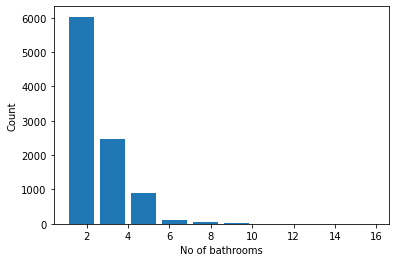

In [50]:
plt.hist(housing_9.bath, rwidth=0.8)
plt.xlabel('No of bathrooms')
plt.ylabel('Count')

#### There is clearly an outler and we need to remove those data points where no of bathrooms is greater than no of rooms by more than 2

In [51]:
housing_9[housing_9.bath > housing_9.bhk+2]

,location,total_sqft,bath,bhk,price,price_per_sqft
530,BTM 1st Stage,3300.0,14.0,9,500.0,15151.515152
1490,Chikkabanavar,2460.0,7.0,4,80.0,3252.032520
4859,Nagasandra,7000.0,8.0,4,450.0,6428.571429
6230,Thanisandra,1806.0,6.0,3,116.0,6423.034330
7819,other,11338.0,9.0,6,1000.0,8819.897689


In [52]:
housing_10 = housing_9[~(housing_9.bath > housing_9.bhk+2)]
housing_10.shape

(9554, 6)

#### We can see that location column is our categorical data so we need to convert into a numerical datatype. To accomplish this, we will use One Hot Encoding(Dummies)

In [53]:
dummies = pd.get_dummies(housing_10.location)
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
housing_11 = pd.concat([housing_10,dummies.drop('other', axis = 'columns')], axis = 'columns')
housing_11.head()

,location,total_sqft,bath,bhk,price,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,4,428.0,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,3,194.0,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3,235.0,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,3,130.0,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2,148.0,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
housing_12 = housing_11.drop('location', axis = 'columns')
housing_12.head()

,total_sqft,bath,bhk,price,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,428.0,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,194.0,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,235.0,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,130.0,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,148.0,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Since column 'price_per_sqft' was used to detect an outlier so it is required to get rid of it now.

In [56]:
housing_13 = housing_12.drop('price_per_sqft', axis = 'columns')
housing_13.head(3)

,total_sqft,bath,bhk,price,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Now, it's time to train our model by training and testing the datasets through splitting

In [57]:
X = housing_13.drop(['price'], axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y = housing_13.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 10)

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8639816796411359

#### 86% score is pretty decent for this dataset by Linear Regression

In [67]:
## K-Fold Cross Validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.81539021, 0.81905882, 0.83280383, 0.85270537, 0.80340845])

#### Majority of the time, K-Fold Cross Validation is giving more than 80% score after Data Cleaning and we got the score of 86%.

In [68]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [69]:
predict_price('Electronic City',1800,4,4)

98.77774230176954

In [70]:
predict_price('Whitefield',1800,4,4)

104.82252877067009

In [71]:
predict_price('Hebbal',1800,4,4)

135.50924071374072